## 課題3.2

In [6]:
using OffsetArrays
using LinearAlgebra
using Statistics
using LaTeXStrings
using Plots
pyplot(w=3, legend=true)

# parameter
const m = 1.
const q = 1.
const τ = 2π
B = [0.; 0.; 1.]

# v init
vinit(n_max::Int) = OffsetArray(hcat([0.; 1.; 0.], zeros(Float64, 3, n_max)), 1:3, 0:n_max)

# differential equation
diff(y_n::AbstractArray) = (y_n × B)q/m

# log₂Eᵣ plot
function Erplot(method!::Function, filename::String)
    domain = 3:18
    Eᵣ = zeros(Float64, domain[end])
    for p = domain
        Δt = τ * 2.0^-p
        n_max = Int(τ/Δt)
        v = vinit(n_max)
        vc = method!(v, n_max, Δt)
        Eᵣ[p] = map(n -> norm(vc[:,n] - [sin(Δt*n); cos(Δt*n); 0.]), 0:n_max)|>maximum
    end
    log₂Eᵣ = log2.(Eᵣ)
    
    scatter!(domain, log₂Eᵣ[domain], xlim=(0,19), lab=L"\log_2E_r(p)")
    
    # least squares method
    @show A = cov(domain, log₂Eᵣ[domain])/var(domain)
    B = mean(log₂Eᵣ[domain]) - A*mean(domain)
    plot!(domain, A.*domain .+ B, lab="least squares")
    
    savefig("img/$(filename).png")
    return
end

Erplot (generic function with 1 method)

### 課題3.2.2
時間刻み$\Delta t$を周期の$2^p$刻みで変化させる．
$$
\Delta t = \tau \times 2^{-p}, \; p = 3,4,5,\cdots,18
$$
 - $0 \leq t \leq \tau$での最大誤差$E_r = max|e_r(t)|$を求め，$p$に対し$\log_2E_r$をプロットせよ．
 - 上記のプロットは一次函数に近い結果が得られる，最小二乗法よりこの傾きを求めよ．ただし，最小二乗法にあたってはgnuplotやExcelを用いてもよい．
 
#### 最小二乗法(一次函数に当てはめる場合)
データ列$(X,Y)$を一次函数$Y=aX+b$に当てはめたとき，誤差の二乗和$\epsilon$は次式で与えられる．
$$
\epsilon = \sum (Y-aX-b)^2
$$
$\epsilon$を最小化して$a$と$b$を求めることを考える．$\epsilon$を$a$と$b$について偏微分すると，
\begin{eqnarray}
    \frac{\partial \epsilon}{\partial a} &=& \sum 2(Y-aX-b)(-X) \\
    \frac{\partial \epsilon}{\partial b} &=& \sum 2(Y-aX-b)(-1)
\end{eqnarray}
$\frac{\partial \epsilon}{\partial a}=0$かつ$\frac{\partial \epsilon}{\partial b}=0$のとき，$\epsilon$が最小になると期待される．連立方程式を解くと次式を得る．
\begin{eqnarray}
    a &=& \frac{(\sum X)(\sum Y) - (\sum 1)(\sum XY)}{(\sum X)^2 - (\sum 1)(\sum X^2)} \\
    b &=& \frac{(\sum X)(\sum XY) - (\sum Y)(\sum X^2)}{(\sum X)^2 - (\sum 1)(\sum X^2)}
\end{eqnarray}

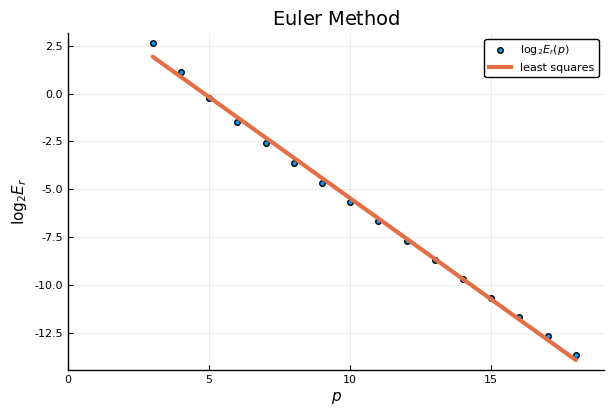

A = cov(domain, log₂Eᵣ[domain]) / var(domain) = -1.0577617719703307


In [7]:
# Euler Method
function euler!(y::AbstractArray, n_max::Int, Δx::Float64)
    for n = 0:n_max-1
        y[:,n+1] = y[:,n] + diff(y[:,n])Δx
    end
    return y
end

plot(xlabel=L"p", ylabel=L"\log_2E_r", title=L"\rm{Euler\;Method}")
Erplot(euler!, "3_2_2-c")

### 課題3.2.3
ホイン法について同様に上記課題3.2.2を実施せよ．


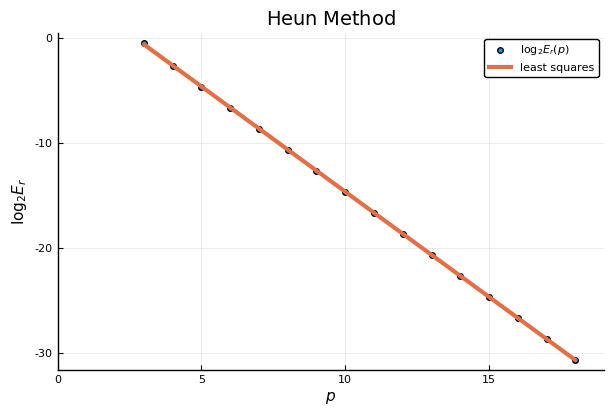

A = cov(domain, log₂Eᵣ[domain]) / var(domain) = -2.0050912202589104


In [8]:
# Heun method
function heun!(y::AbstractArray, n_max::Int, Δx::Float64)
    for n = 0:n_max-1
        k₁ = diff(y[:,n])Δx
        k₂ = diff(y[:,n] + k₁)Δx
        y[:,n+1] = y[:,n] + (k₁+k₂)/2
    end
    return y
end

plot(xlabel=L"p", ylabel=L"\log_2E_r", title=L"\rm{Heun\;Method}")
Erplot(heun!, "3_2_3-c")

### 課題3.2.4
4次のルンゲクッタ法(古典的ルンゲクッタ法)について同様に上記課題3.2.2を実施せよ．

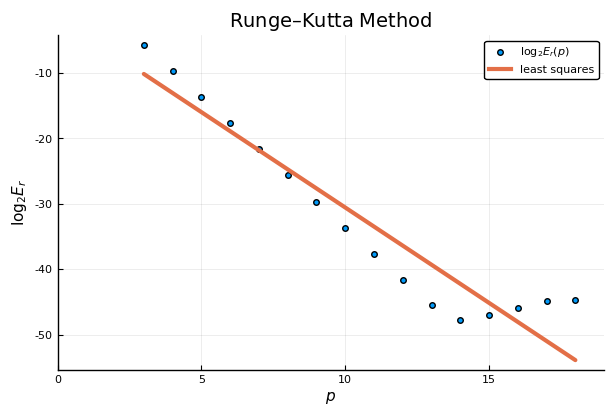

A = cov(domain, log₂Eᵣ[domain]) / var(domain) = -2.9153892668295787


In [9]:
# the classical Runge–Kutta method
function RK4!(y::AbstractArray, n_max::Int, Δx::Float64)
    for n = 0:n_max-1
        k₁ = diff(y[:,n])Δx
        k₂ = diff(y[:,n] + k₁/2)Δx
        k₃ = diff(y[:,n] + k₂/2)Δx
        k₄ = diff(y[:,n] + k₃)Δx
        y[:,n+1] = y[:,n] + (k₁+2k₂+2k₃+k₄)/6
    end
    return y
end

plot(xlabel=L"p", ylabel=L"\log_2E_r", title=L"\rm{Runge–Kutta\;Method}")
Erplot(RK4!, "3_2_4-c14")

A = cov(domain, log₂Eᵣ[domain]) / var(domain) = -1.0577617719703307
A = cov(domain, log₂Eᵣ[domain]) / var(domain) = -2.0050912202589104


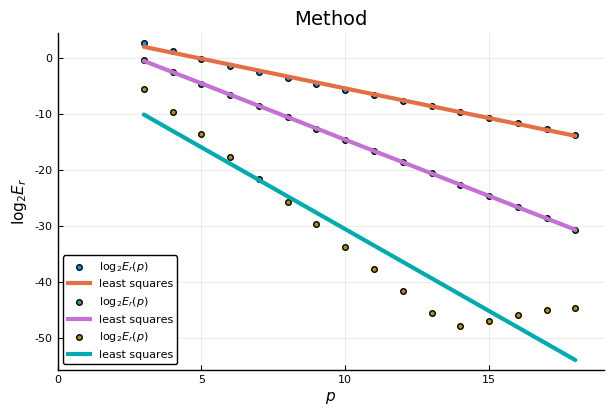

A = cov(domain, log₂Eᵣ[domain]) / var(domain) = -2.9153892668295787


In [10]:
plot(xlabel=L"p", ylabel=L"\log_2E_r", title=L"\rm{Method}")
Erplot(euler!, "3_2-c")
Erplot(heun!, "3_2-c")
Erplot(RK4!, "3_2-c")